In [18]:
import numpy as np
import matplotlib.pyplot as plt

# To plot pretty figures
import matplotlib as mpl
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12) 

# Make rand predictable
np.random.seed(123)


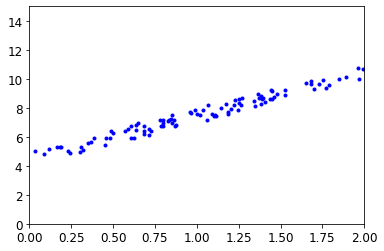

In [19]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)

plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()


# Closed Form Solution

[[4.55902793]
 [2.94623846]]

[[ 4.55902793]
 [10.45150485]]


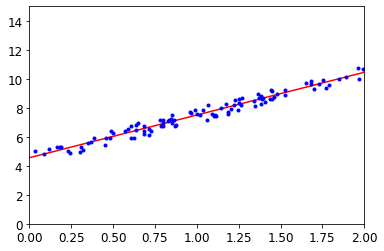

In [20]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(f"{theta_best}\n")

X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
print(y_predict)


plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

# sklearn.LinearRegression

[4.55902793], [[2.94623846]]

[[ 4.55902793]
 [10.45150485]]


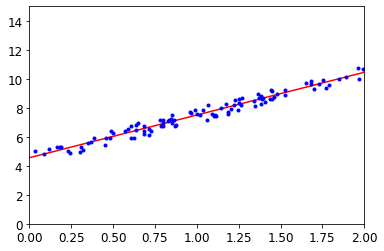

In [21]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(f"{lin_reg.intercept_}, {lin_reg.coef_}\n")
y_predict = lin_reg.predict(X_new)
print(y_predict)

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

# Gradient Descent

## Batch Gradient Descent

In [22]:
eta = 0.1 # Learning rate
n_iterations = 1000
m = len(X_b)

theta = np.random.randn(2, 1)  # random initialization


for iteration in range(n_iterations):
    gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

print(theta)

X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta)
print(y_predict)

[[4.55902793]
 [2.94623846]]
[[ 4.55902793]
 [10.45150485]]


## Stochastic Gradient Descent

In [23]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters


def learning_schedule(t):
    return t0 / (t + t1)


theta = np.random.randn(2, 1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

print(theta)

X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta)
print(y_predict)

[[4.54971943]
 [2.95192834]]
[[ 4.54971943]
 [10.45357611]]


In [24]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

print(f"{sgd_reg.intercept_}, {sgd_reg.coef_}")

y_predict = sgd_reg.predict(X_new)
print(y_predict)

[4.49600774], [2.96358974]
[ 4.49600774 10.42318722]


# Polynominal Regression

$y=0.5x^2_1+1.0x_1+2.0$ mix with some Guassian noise

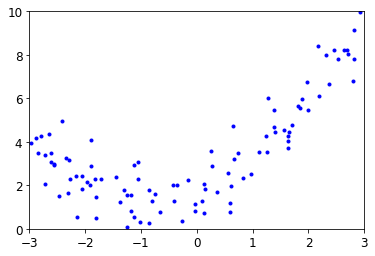

In [25]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

plt.plot(X, y, "b.")
plt.axis([-3, 3, 0, 10])
plt.show()


In [26]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print(X[0])
print(X_poly[0])

[-0.75275929]
[-0.75275929  0.56664654]


Not bad, we have $y=0.565x^2_1+0.934x_1+1.782$ when the ground true polynomial is $y=0.5x^2_1+1.0x_1+2.0$

In [27]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

print(f"{lin_reg.intercept_}, {lin_reg.coef_}")

[1.78134581], [[0.93366893 0.56456263]]


(0, 10)

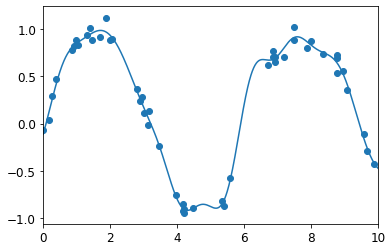

In [28]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline


class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Uniformly spaced Gaussian features for one-dimensional input"""

    def __init__(self, N, width_factor=1.0):
        self.N = N
        self.width_factor = width_factor

    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))

    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self

    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,
                                 self.width_, axis=1)


gauss_model = make_pipeline(GaussianFeatures(20),
                            LinearRegression())

rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)
xfit = np.linspace(0, 10, 1000)
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 10)